In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import ttest_ind as ttest
from statsmodels.stats.multitest import fdrcorrection as fdr
from matplotlib import pyplot as plt
from umap import UMAP
from sklearn.cluster import DBSCAN
import hdbscan
import sys
sys.path.insert(0, '../../')
sys.path.insert(0, '../../cycif/')
from get_data import file2frame
from cycif import *
from common_apis import *

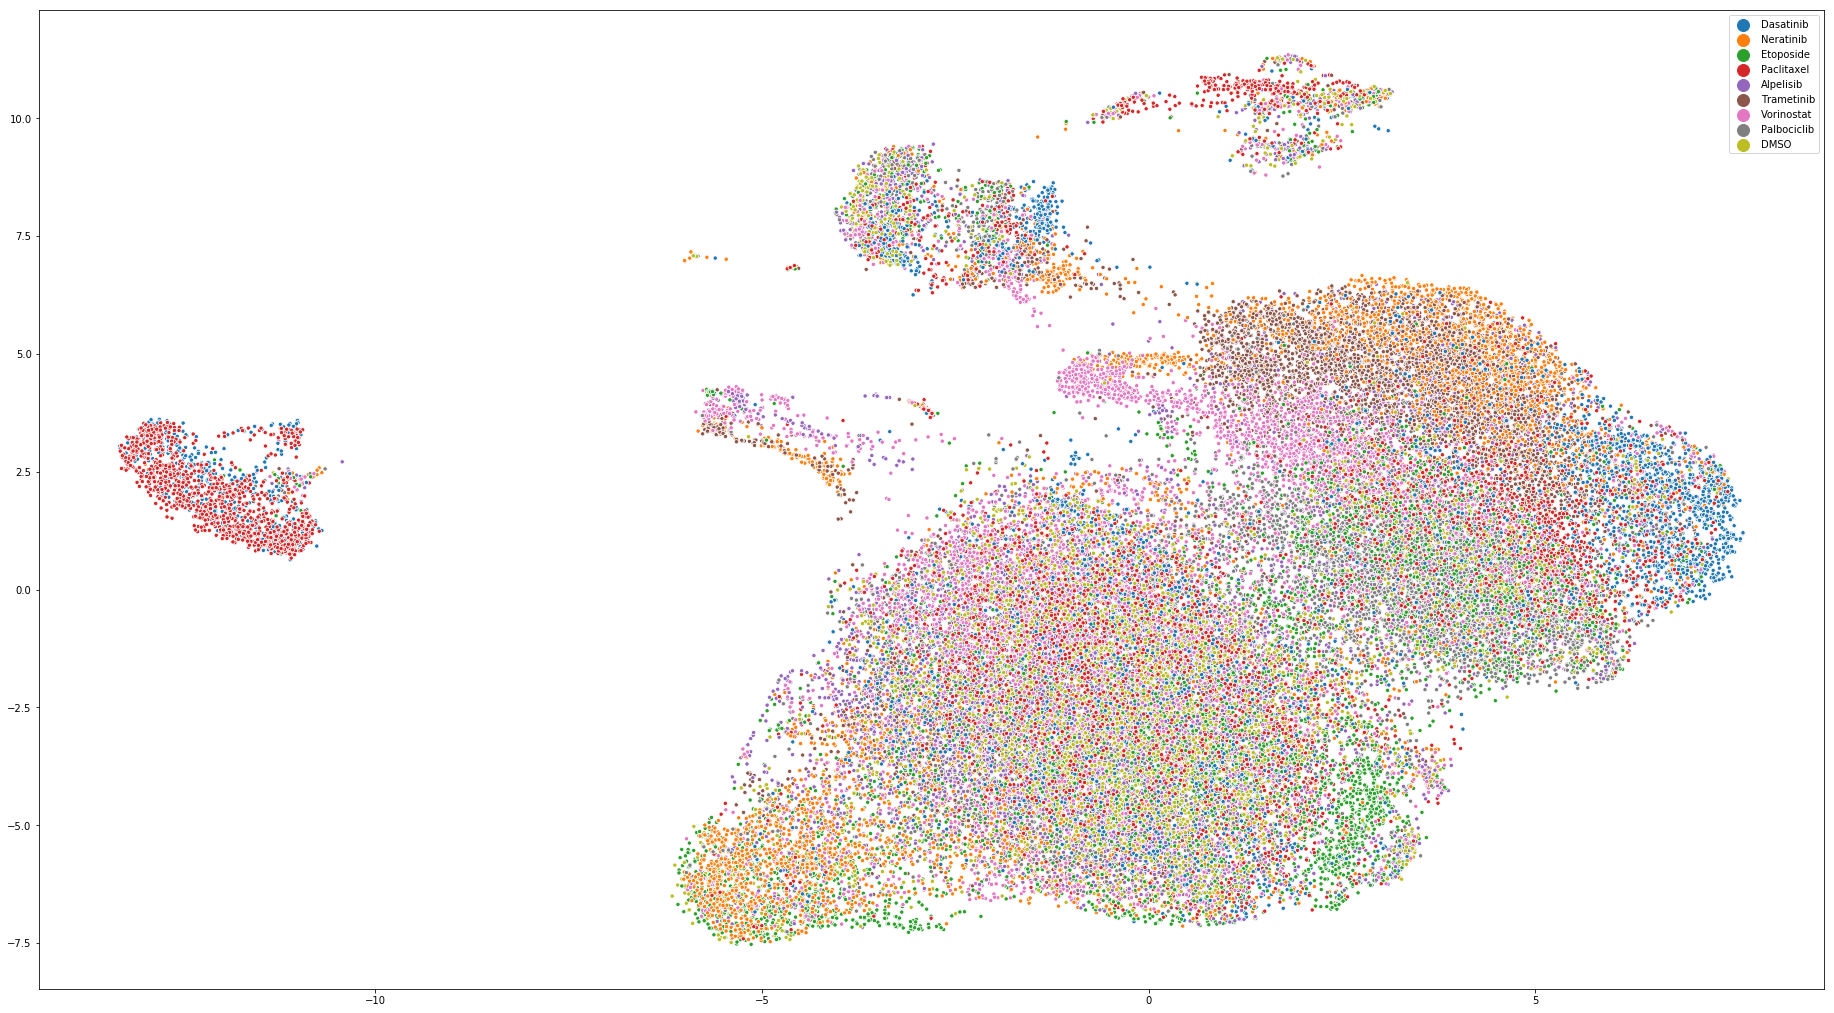

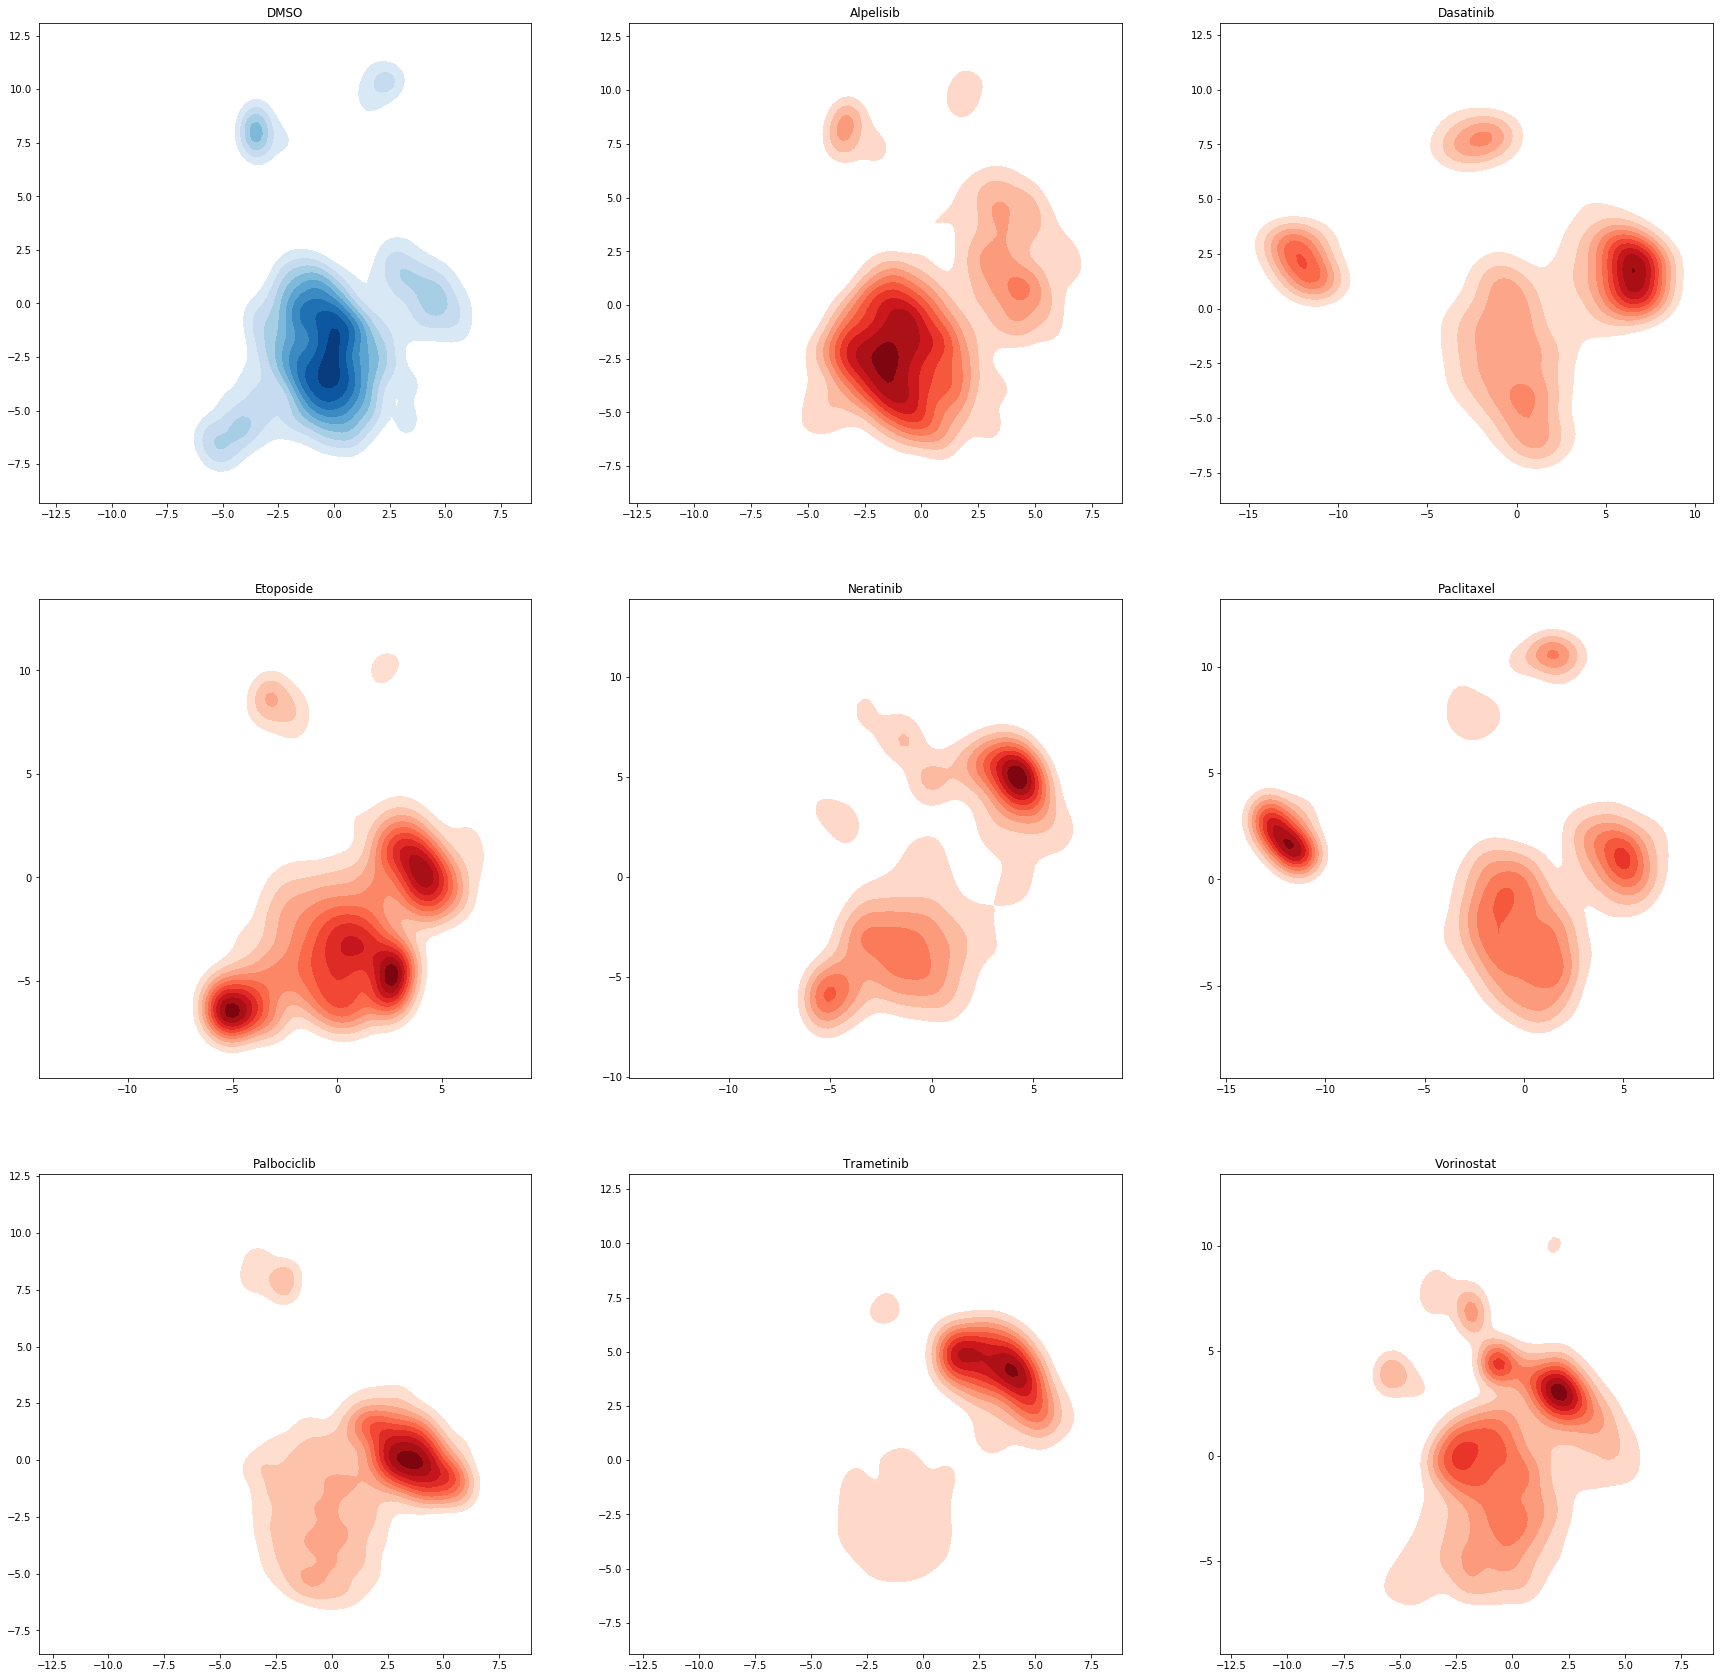

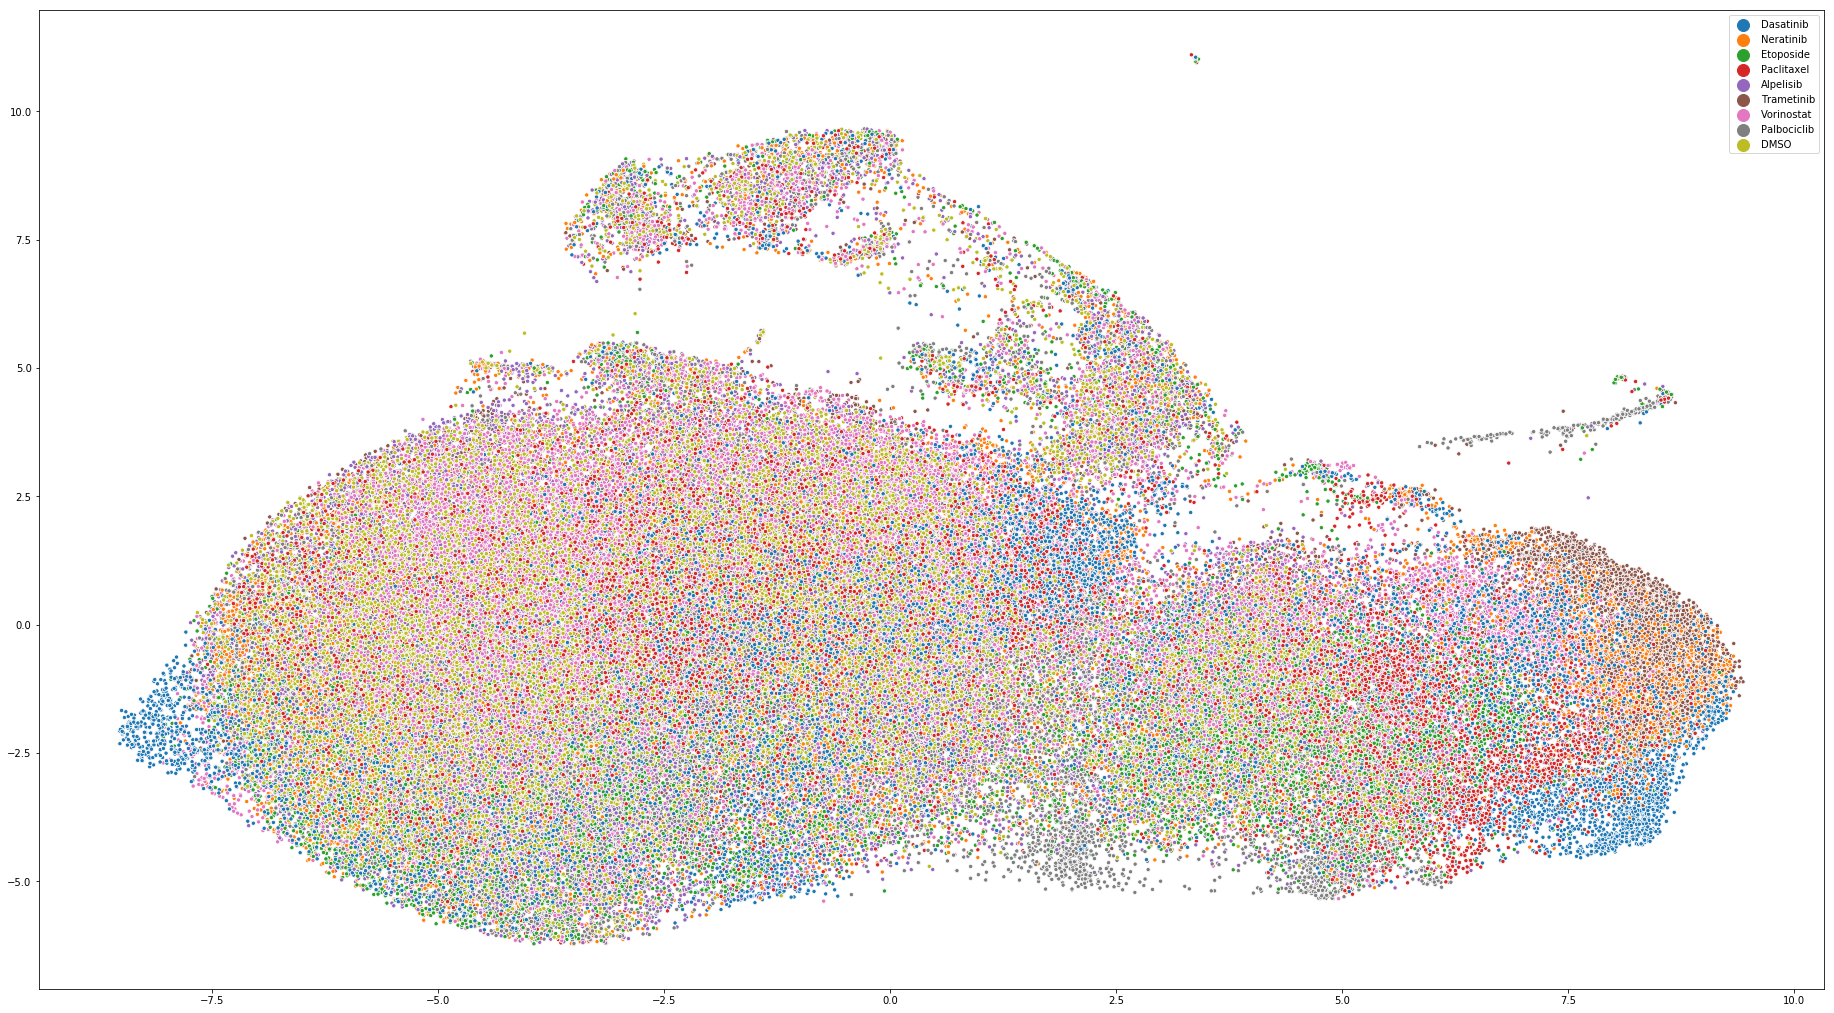

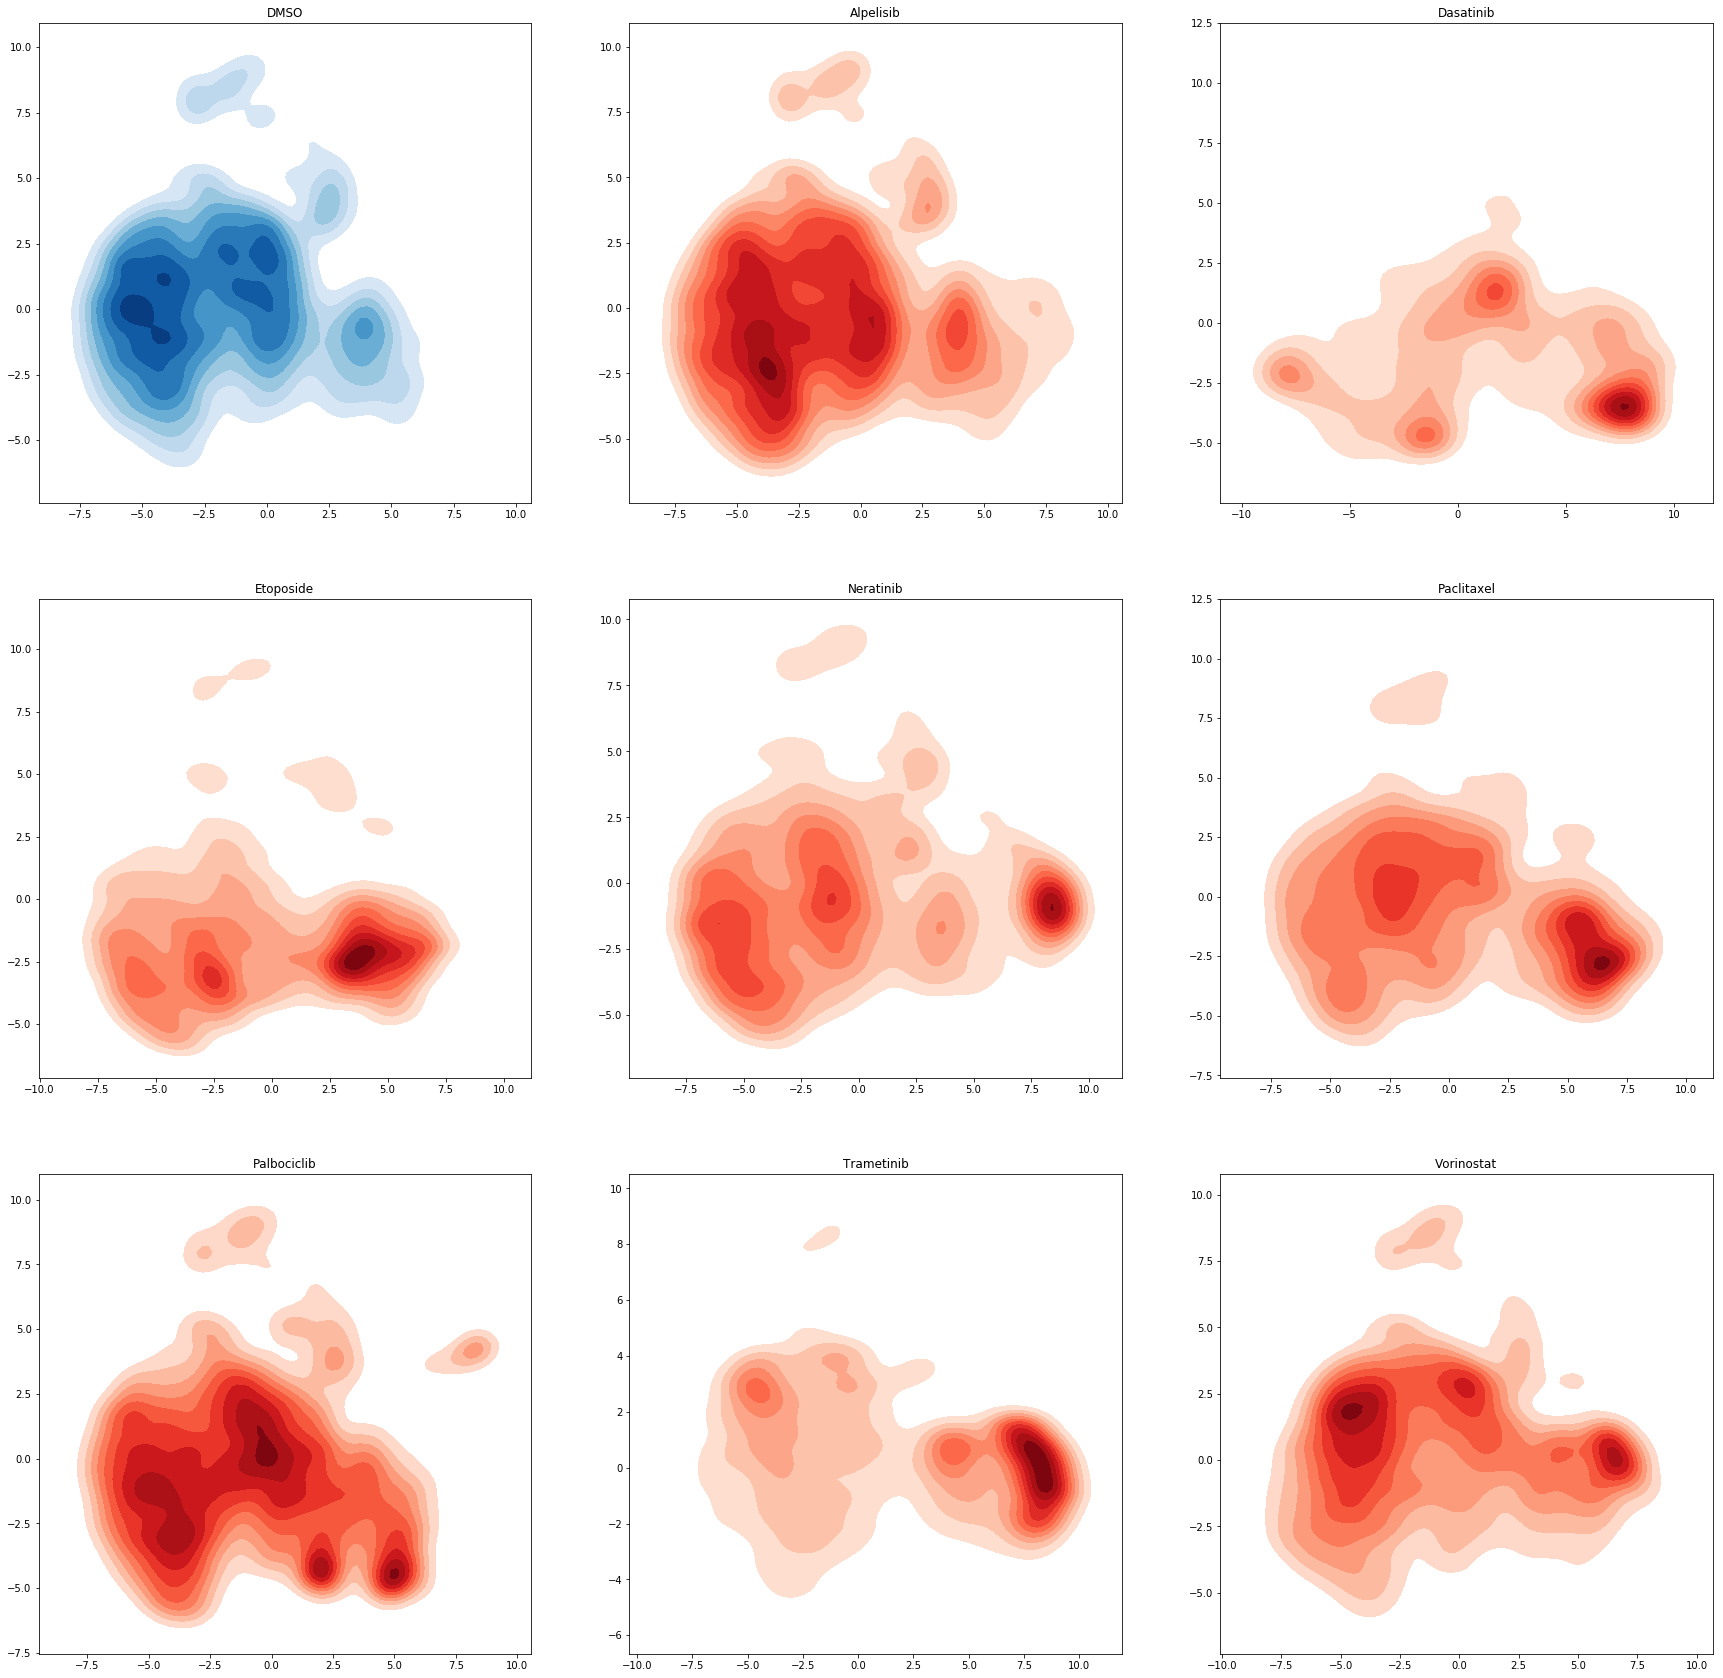

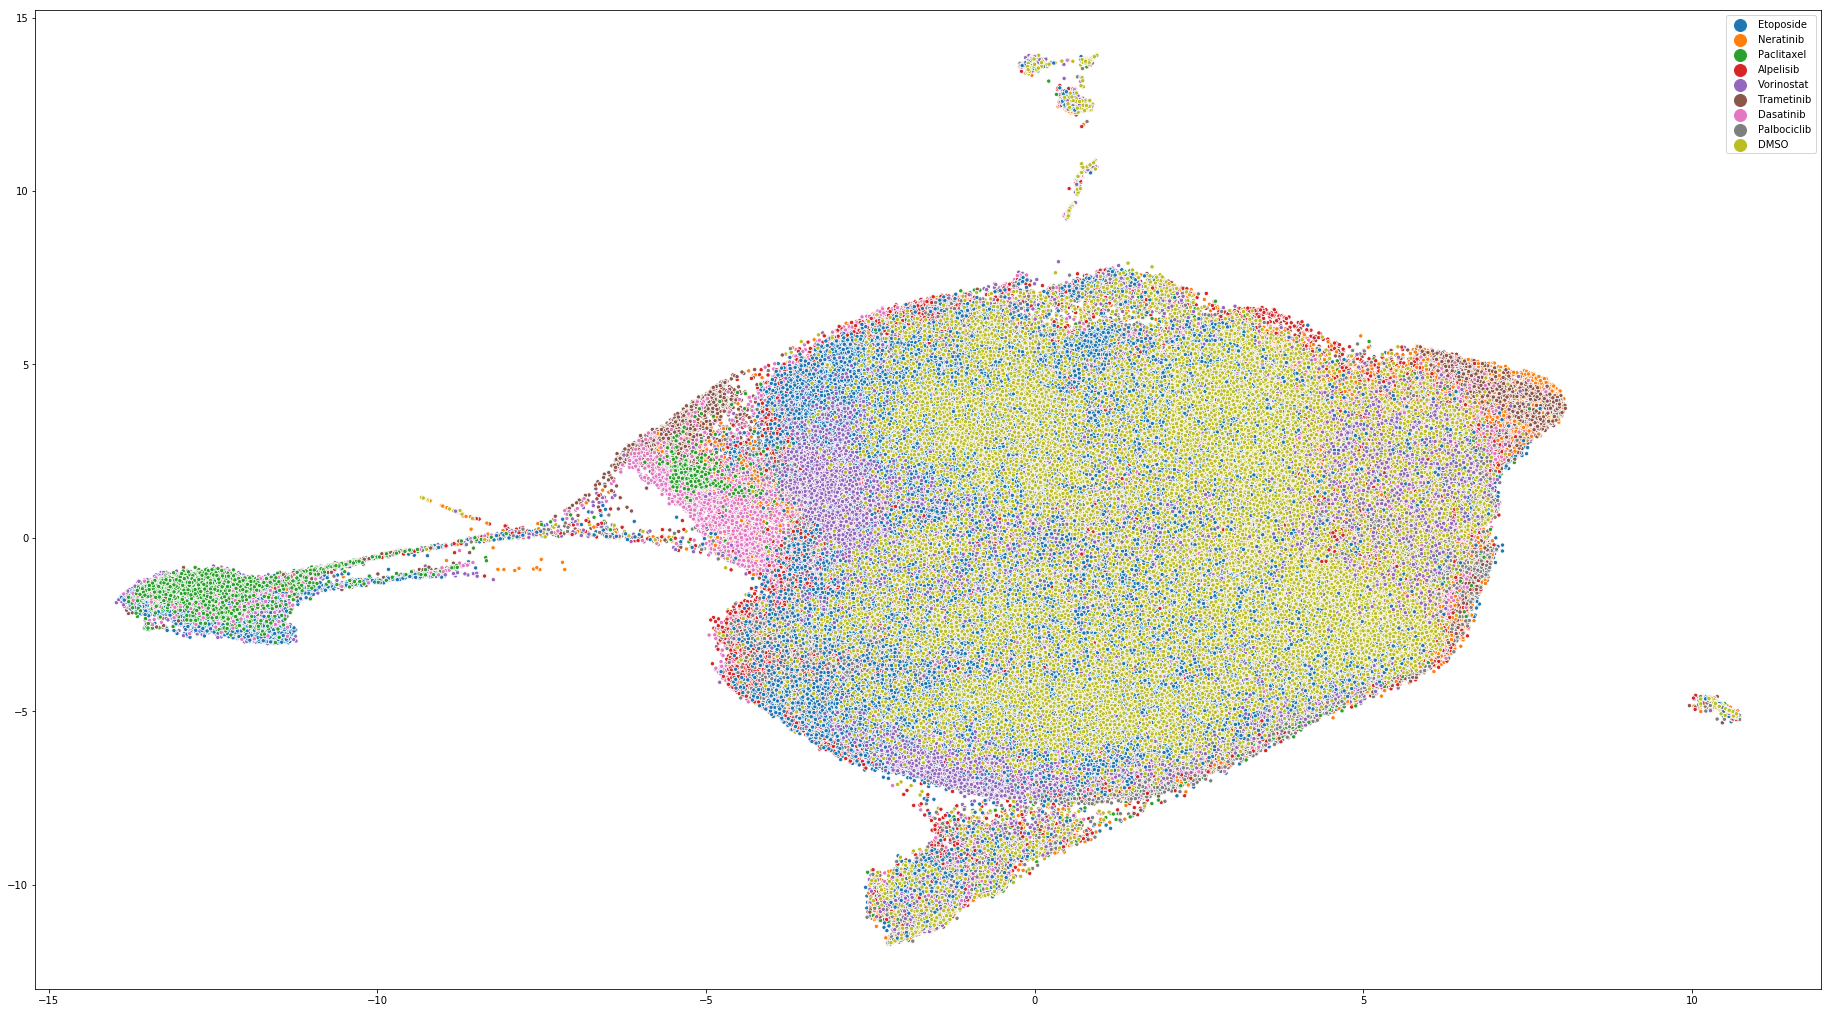

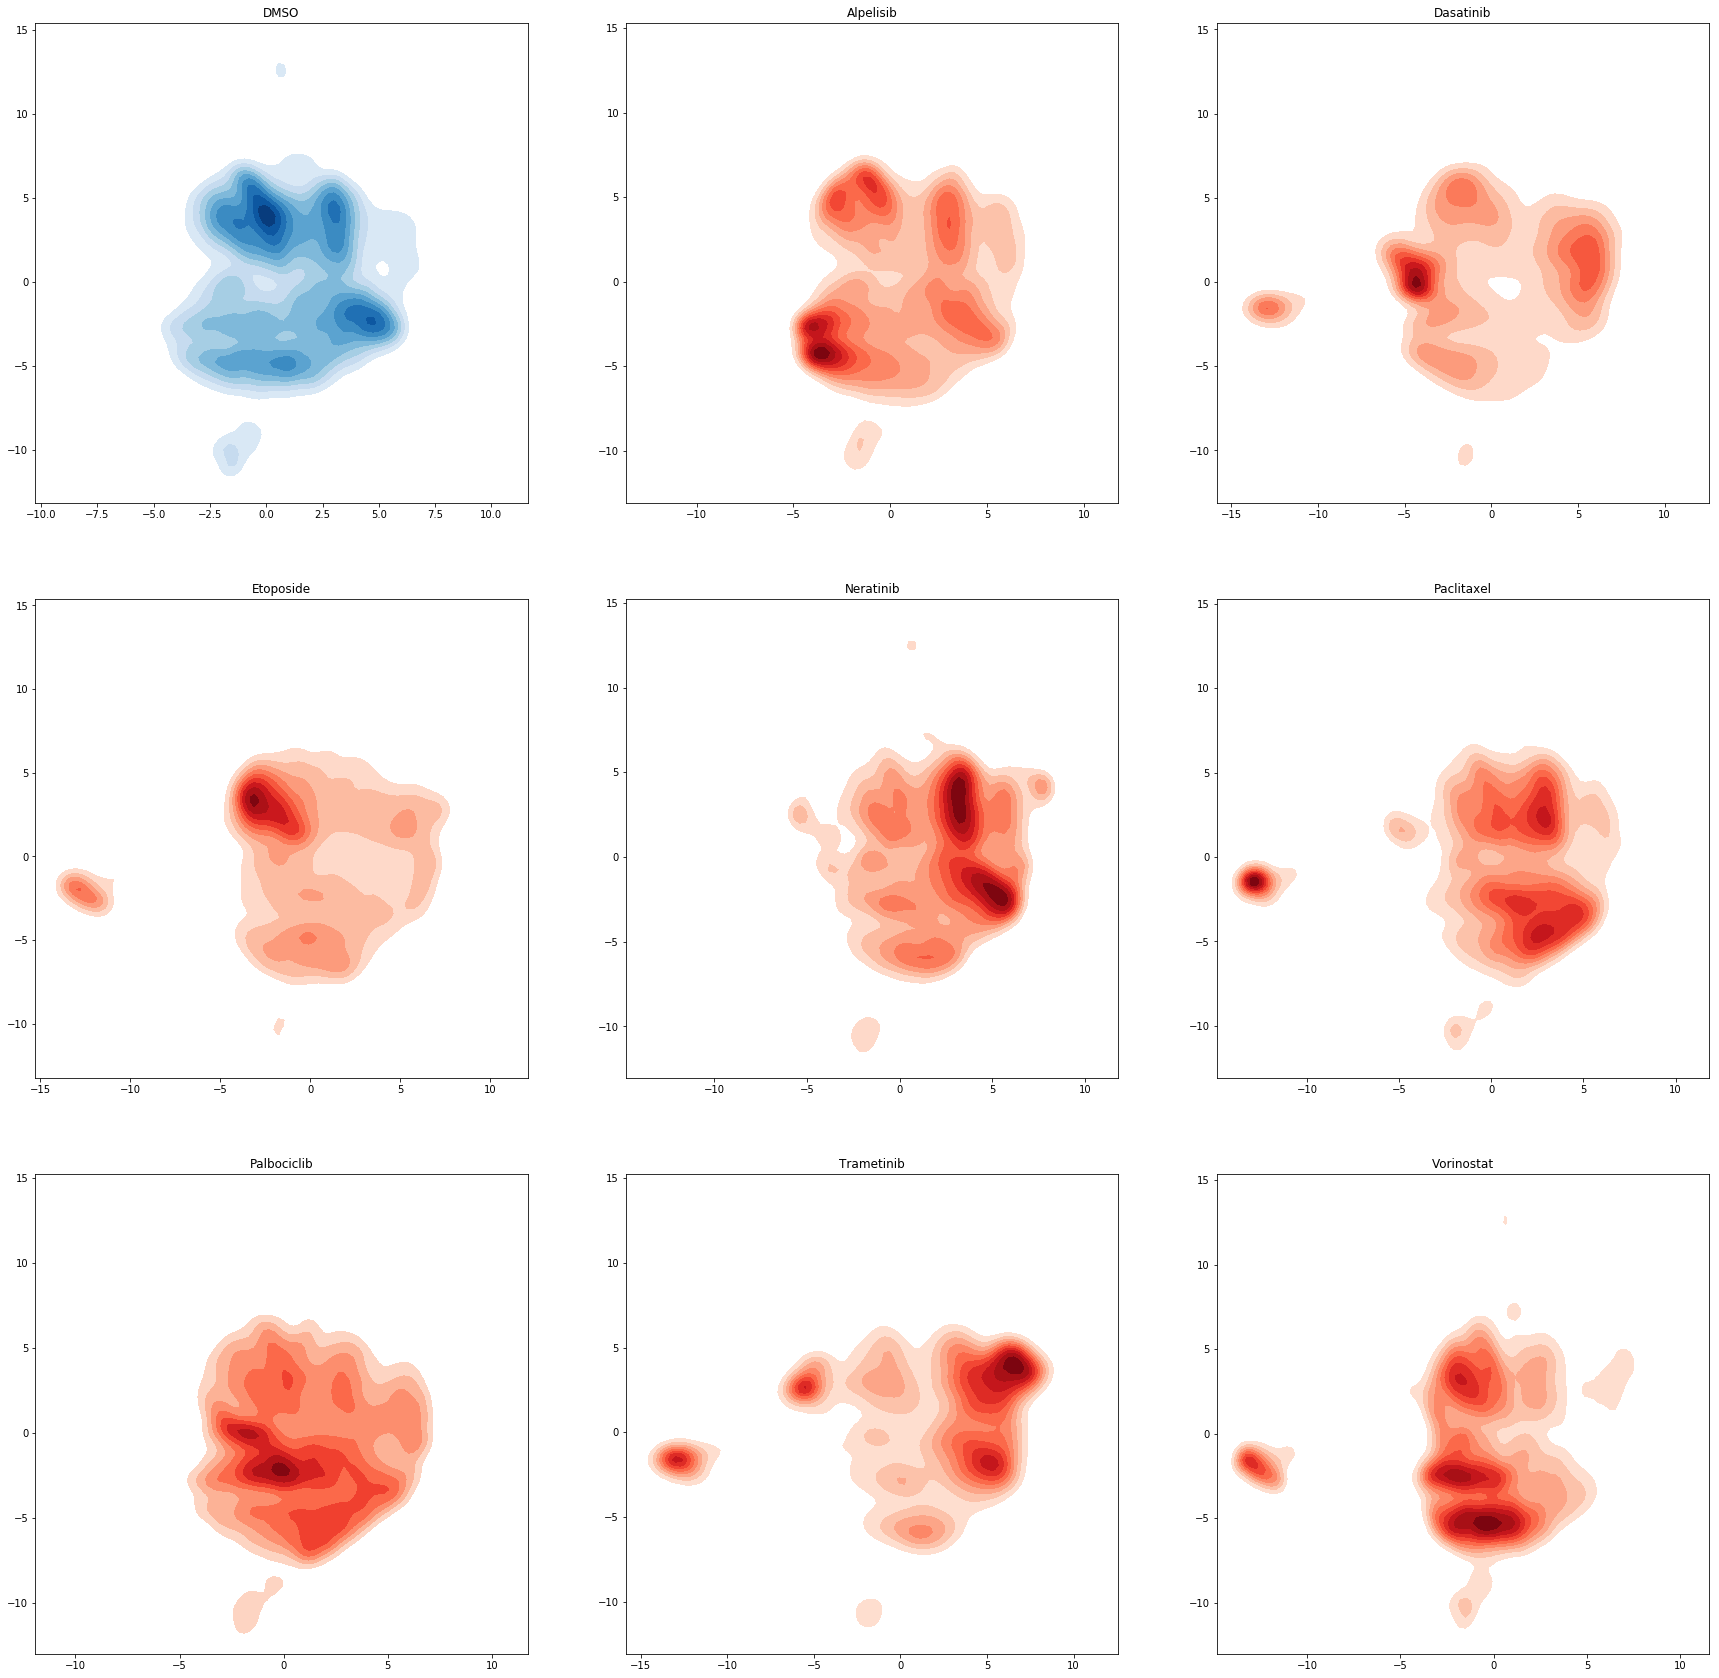

In [2]:
os.chdir('d:/data')
umap = UMAP(n_components=2,n_neighbors=50, min_dist = 0.4)
metadata = pd.read_csv('MCF10A commons metadata.csv',index_col=0)
for time in ['24h','48h','72h']:
    fn = 'MCF10A commons pooled data '+ time + '.csv'
    df_data = pd.read_csv(fn,index_col=0)
    df_data_umap = umap.fit_transform(df_data)
    import seaborn as sns
    labels = metadata[metadata.time==time].DrugName
    plt.figure(figsize=(32,18))
    fig = sns.scatterplot(df_data_umap[:,0],df_data_umap[:,1],hue = labels.values,markers='.', estimator = None, size = 0.0001)
    handles, labels = fig.get_legend_handles_labels()
    fig.legend(handles[:9], labels[:9], markerscale=2)
    plt.savefig(time+'.png')
    plt.show()
    plt.close()
    
    # contour maps
    labels = metadata[metadata.time==time].DrugName.reset_index()                                     
    # Set up the figure
    _,axs = plt.subplots(3,3,figsize=(30, 30))
    axs = axs.ravel()
    dmso = labels[labels.iloc[:,1]=='DMSO'].index
    dmso = df_data_umap[dmso,:]
    # Draw the two density plots
    dmso_plot = sns.kdeplot(dmso[:,0], dmso[:,1],cmap="Blues", shade=True, shade_lowest=False, ax = axs[0])
    dmso_plot.set_title('DMSO')                                  
    ax_i = 1
    for drug in sorted(labels.iloc[:,1].unique()):
        if drug == 'DMSO':
            continue
        idx = labels[labels.iloc[:,1]==drug].index
        df_drug = df_data_umap[idx,:]
        subplot = sns.kdeplot(df_drug[:,0], df_drug[:,1],cmap="Reds", shade=True, shade_lowest=False,ax = axs[ax_i])
        subplot.set_title(drug)
        ax_i+=1
    plt.savefig(time+' Distribution contour plot.png')